In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('bank_new.csv')
df.head(3)

,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,NaN,1,2,0


In [4]:
dum_col = ['job','marital','education','default','housing','loan','contact','month']
dummied = pd.get_dummies(df[dum_col], drop_first=True)
dummied.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df2 = pd.concat([df,dummied],axis=1)
df2 = df2.drop(columns=dum_col)
df2.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,39,1756,3,370.055237,1,0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,51,1443,18,233.998933,10,0,1,False,True,...,False,True,False,False,False,False,False,False,False,False
2,3,36,436,13,NaN,1,2,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,63,474,25,252.525808,1,0,0,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,31,354,30,NaN,1,2,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
train_val, test = train_test_split(df2, random_state=9, test_size=0.1)
#test_size=0.2にしたりするといっきに外れ値のmcd値が下がる

In [7]:
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13378,13379,46,0,10,378.293875,1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,False
3800,3801,41,-333,30,300.845752,3,2,0,True,False,...,False,False,True,False,False,False,False,False,False,False
10398,10399,30,5389,6,159.053623,3,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
23401,23402,39,255,5,334.802583,1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
26223,26224,47,33,5,NaN,1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False


In [8]:
no_data = train_val.isnull().sum()
no_data[no_data>0]

duration    6331
dtype: int64

In [9]:
from sklearn.covariance import MinCovDet

train_val2 = train_val.drop(columns=['id'])
train_val2 = train_val2.dropna()
train_val2

,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13378,46,0,10,378.293875,1,0,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3800,41,-333,30,300.845752,3,2,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
10398,30,5389,6,159.053623,3,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23401,39,255,5,334.802583,1,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
25158,52,556,13,231.375776,6,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25725,45,14,18,315.275502,9,5,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9979,59,3694,5,395.617358,10,0,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
22584,33,-208,4,424.191814,3,1,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
501,55,4746,23,404.106909,3,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(train_val2)
tmp = mcd.mahalanobis(train_val2)
distance = pd.Series(tmp)

In [11]:
distance

0         30.914718
1         78.512220
2         32.620429
3         14.752679
4         22.603732
            ...    
18079    140.822449
18080     59.752067
18081     19.462121
18082     30.973451
18083     11.850268
Length: 18084, dtype: float64

<Axes: >

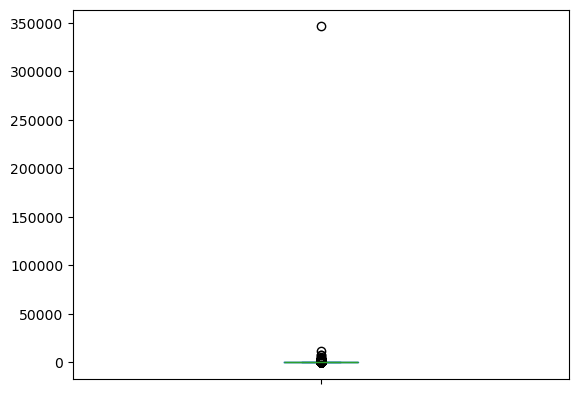

In [12]:
distance.plot(kind='box')

In [13]:
un = distance[distance>200000].index
un[0]

2561

In [14]:
no = train_val2.iloc[un[0]:(un[0]+1),:].index

In [15]:
train_val3 = train_val2.drop(no)

In [16]:
train_val3.corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.559269
loan_yes                     0.374871
y                            0.279582
age                          0.208929
month_aug                    0.188017
month_may                    0.186111
marital_single               0.165022
marital_married              0.115441
job_student                  0.108389
previous                     0.102252
contact_sending _document    0.088832
education_tertiary           0.083440
job_blue-collar              0.081568
month_jun                    0.066075
month_oct                    0.053041
job_management               0.047512
job_unknown                  0.046511
job_unemployed               0.044287
month_mar                    0.043928
job_housemaid                0.039260
education_secondary          0.034967
job_retired                  0.033636
month_sep                    0.032166
amount                       0.030493
day                          0.022636
job_services

In [17]:
tmp_col = ['housing_yes','loan_yes','age','marital_single','marital_married']
x = train_val3[tmp_col]
y = train_val3['duration']

In [18]:
linear_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [19]:
linear_model.fit(x_train,y_train)
linear_model.score(x_train,y_train)

0.7271716281495897

In [ ]:
train

In [20]:
is_null = train_val['duration'].isnull()

In [21]:
pre = train_val.loc[is_null,tmp_col]

In [22]:
predict = linear_model.predict(pre)

In [23]:
pre

,housing_yes,loan_yes,age,marital_single,marital_married
26223,True,False,47,True,False
3156,False,False,31,True,False
6371,True,False,51,False,True
11809,True,True,48,False,True
24145,False,False,30,False,True
...,...,...,...,...,...
11681,False,False,54,False,True
10481,False,False,48,False,True
5014,False,False,28,False,False
23166,False,False,38,False,True


In [24]:
train_val.loc[is_null,'duration'] = predict

In [25]:
train_val.isnull().any()

id                           False
age                          False
amount                       False
day                          False
duration                     False
campaign                     False
previous                     False
y                            False
job_blue-collar              False
job_entrepreneur             False
job_housemaid                False
job_management               False
job_retired                  False
job_self-employed            False
job_services                 False
job_student                  False
job_technician               False
job_unemployed               False
job_unknown                  False
marital_married              False
marital_single               False
education_secondary          False
education_tertiary           False
education_unknown            False
default_yes                  False
housing_yes                  False
loan_yes                     False
contact_sending _document    False
contact_telephone   

In [26]:
train_val = 

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13378,13379,46,0,10,378.293875,1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,False
3800,3801,41,-333,30,300.845752,3,2,0,True,False,...,False,False,True,False,False,False,False,False,False,False
10398,10399,30,5389,6,159.053623,3,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
23401,23402,39,255,5,334.802583,1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
26223,26224,47,33,5,365.104007,1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22584,22585,33,-208,4,424.191814,3,1,0,True,False,...,False,False,False,False,False,False,True,False,False,False
501,502,55,4746,23,404.106909,3,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
23166,23167,38,304,11,192.802426,1,5,0,False,False,...,False,False,False,False,False,False,True,False,False,False
20828,20829,35,628,29,266.249751,2,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False


<Axes: ylabel='Frequency'>

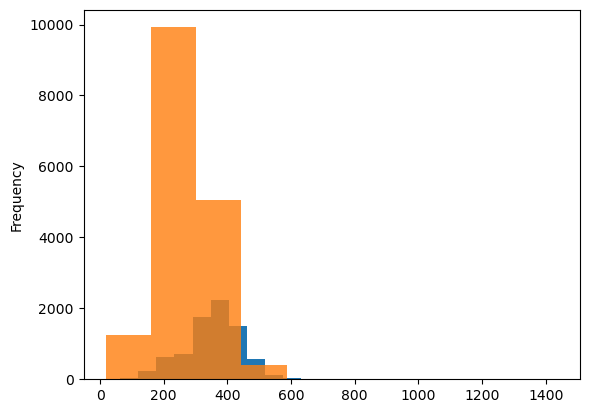

In [27]:
train_val.loc[train_val['y']==1,'duration'].plot(kind='hist')
train_val.loc[train_val['y']==0,'duration'].plot(kind='hist', alpha=0.8)